# **1. INTRODUCTION**
---
Title:

Member : 
1. Devin Lee
2. Fernaldy Wirjowerdojo
3. Muhammad Furqon Pakpahan
4. Sifra Siregar

Background:

Objectives:

# **2. IMPORT LIBRARIES**

In [112]:
import boto3
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import phik
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS
from text_preprocessed import text_preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
import tensorflow as tf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import TextVectorization, Embedding, Dense, LSTM, GRU, Conv1D, MaxPooling1D, Bidirectional, Dropout, GlobalMaxPooling1D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

import warnings

In [113]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\leede\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\leede\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\leede\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# **3. LOAD DATA**

In [114]:
warnings.filterwarnings('ignore')

In [115]:
# Path to the credentials file
credentials_file_path = 'aws_credentials/aws_credentials_fernaldy.txt'

# Read the credentials file and set environment variables
with open(credentials_file_path, 'r') as file:
    for line in file:
        key, value = line.strip().split('=')
        os.environ[key] = value

FileNotFoundError: [Errno 2] No such file or directory: 'aws_credentials/aws_credentials_fernaldy.txt'

In [ ]:
# Create a Boto3 S3 resource
s3 = boto3.resource('s3')

# Download the file
bucket = s3.Bucket('hck-009-group-2')
bucket.download_file('clean_data/data_clean.csv', './data_clean.csv')

In [116]:
data = pd.read_csv('data_clean.csv')
data

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity
0,coloring book moana,art_and_design,3.9,967,14m,500000,free,0.0,everyone,"['art & design', 'pretend play']",2018-01-15,2.0.0,4.0.3 and up,a kid's excessive ads. the types ads allowed a...,negative,-0.25,1.00
1,coloring book moana,art_and_design,3.9,967,14m,500000,free,0.0,everyone,"['art & design', 'pretend play']",2018-01-15,2.0.0,4.0.3 and up,it bad >:(,negative,-0.72,0.83
2,coloring book moana,art_and_design,3.9,967,14m,500000,free,0.0,everyone,"['art & design', 'pretend play']",2018-01-15,2.0.0,4.0.3 and up,like,neutral,0.00,0.00
3,coloring book moana,art_and_design,3.9,967,14m,500000,free,0.0,everyone,"['art & design', 'pretend play']",2018-01-15,2.0.0,4.0.3 and up,i love colors inspyering,positive,0.50,0.60
4,coloring book moana,art_and_design,3.9,967,14m,500000,free,0.0,everyone,"['art & design', 'pretend play']",2018-01-15,2.0.0,4.0.3 and up,i hate,negative,-0.80,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40311,a+ gallery - photos & videos,photography,4.5,223941,varies with device,10000000,free,0.0,everyone,['photography'],2018-08-06,varies with device,varies with device,overall great app. best gallery seen far,positive,0.48,0.51
40312,a+ gallery - photos & videos,photography,4.5,223941,varies with device,10000000,free,0.0,everyone,['photography'],2018-08-06,varies with device,varies with device,"recommended, 100% love it, keep good work dev ...",positive,0.57,0.73
40313,a+ gallery - photos & videos,photography,4.5,223941,varies with device,10000000,free,0.0,everyone,['photography'],2018-08-06,varies with device,varies with device,too much ads,positive,0.20,0.20
40314,a+ gallery - photos & videos,photography,4.5,223941,varies with device,10000000,free,0.0,everyone,['photography'],2018-08-06,varies with device,varies with device,just allow time ...,neutral,0.00,0.00


Drop Duplicated Columns

In [117]:
data.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver', 'translated_review', 'sentiment', 'sentiment_polarity',
       'sentiment_subjectivity'],
      dtype='object')

In [118]:
data = data.drop_duplicates(subset=['app', 'category', 'rating', 'size', 'installs', 'type',
                                    'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
                                    'android_ver', 'translated_review', 'sentiment', 'sentiment_polarity',
                                    'sentiment_subjectivity'], keep='first')

In [119]:
data.shape

(30117, 17)

# **4. EXPLORATORY DATA ANALYSIS (EDA)**

## ***4.1. Data Explore***

- **4.1.1 Data Information**

In [120]:
# Display Info
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30117 entries, 0 to 40315
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   app                     30117 non-null  object 
 1   category                30117 non-null  object 
 2   rating                  30117 non-null  float64
 3   reviews                 30117 non-null  int64  
 4   size                    30117 non-null  object 
 5   installs                30117 non-null  int64  
 6   type                    30117 non-null  object 
 7   price                   30117 non-null  float64
 8   content_rating          30117 non-null  object 
 9   genres                  30117 non-null  object 
 10  last_updated            30117 non-null  object 
 11  current_ver             30117 non-null  object 
 12  android_ver             30117 non-null  object 
 13  translated_review       30117 non-null  object 
 14  sentiment               30117 non-null  obj

- **4.1.2 Data Shape**

In [121]:
# Checking Data Shape
data.shape

(30117, 17)

- **4.1.3 Missing Value**

In [122]:
# Checking Missing Value
data.isnull().sum()

app                       0
category                  0
rating                    0
reviews                   0
size                      0
installs                  0
type                      0
price                     0
content_rating            0
genres                    0
last_updated              0
current_ver               0
android_ver               0
translated_review         0
sentiment                 0
sentiment_polarity        0
sentiment_subjectivity    0
dtype: int64

## ***4.2. Descriptive Statistics Analysis***

**4.2.1 Data Summary**

In [123]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rating,30117.0,4.297304e+00,3.052101e-01,2.6,4.10,4.30,4.50,4.900000e+00
reviews,30117.0,1.423388e+06,6.179188e+06,46.0,9971.00,59158.00,399009.00,7.815831e+07
installs,30117.0,3.718110e+07,1.347455e+08,1000.0,1000000.00,5000000.00,10000000.00,1.000000e+09
price,30117.0,9.730285e-02,1.302302e+00,0.0,0.00,0.00,0.00,2.999000e+01
sentiment_polarity,30117.0,1.839629e-01,3.531091e-01,-1.0,0.00,0.15,0.41,1.000000e+00
sentiment_subjectivity,30117.0,4.928844e-01,2.615483e-01,0.0,0.36,0.51,0.65,1.000000e+00


**Rating**:
- Most apps have a good rating, around 4.32 on average.
- Ratings go from 2.6 to 4.9, with many falling between 4.2 and 4.5.

**Reviews**:
- Apps have a wide range of reviews, from a few dozen to millions.
- On average, an app has about 2.2 million reviews.
- The middle range is from 17,000 to 1.5 million reviews.

**Installs**:
- Apps are installed a lot, with an average of 59 million installs.
- Install numbers vary, from 1,000 to a billion.
- Many apps fall between 1 million and 50 million installs.

**Price**:
- Most apps are free; the average price is only 8 cents.
- Prices range from free to $29.99.
  
**Sentiment Polarity**:
- On average, people express a slightly positive sentiment (feeling) about apps.
- Sentiment ranges from strongly negative to strongly positive.
  
**Sentiment Subjectivity**:
- People express a balanced mix of objective and subjective feelings about apps.
- Subjectivity ranges from completely objective to completely subjective.

In [124]:
# Checking kurtosis
kurt = data.kurt(numeric_only=True)
kurt

rating                      3.158545
reviews                   106.412895
installs                   40.958762
price                     383.975627
sentiment_polarity          0.646310
sentiment_subjectivity     -0.310063
dtype: float64

**Kurtosis:**

**Rating** (3.677492):
- Ratings have some extreme values, both very high and very low.

**Reviews** (69.726271):
- Some apps have a lot more reviews than others, making the distribution more peaked.

**Installs** (22.547344):
- A few apps have a significantly higher number of installs, making the distribution more peaked.

**Price** (503.693728):
- Some apps have very high prices, causing the distribution to have extremely heavy tails.

**Sentiment Polarity** (0.753633):
- There are some apps with extremely positive or extremely negative sentiment, making the distribution more peaked.

**Sentiment Subjectivity** (-0.124254):
- The sentiment subjectivity values are spread out, not concentrated around a central value.

In [125]:
# Checking Skewness
skew = data.skew(numeric_only=True)
skew

rating                    -1.307910
reviews                    9.500859
installs                   6.300785
price                     18.319211
sentiment_polarity        -0.121698
sentiment_subjectivity    -0.303908
dtype: float64

**Skewness:**

**Rating** (-1.391847):
- More apps tend to have higher ratings, and fewer have lower ratings.

**Reviews** (7.643747):
- A few apps have a lot of reviews, pulling the distribution towards higher values.
  
**Installs** (4.754725):
- Some apps have significantly more installs than others, making the distribution right-skewed.
  
**Price** (20.887272):
- A few apps have very high prices, causing the distribution to be right-skewed.
  
**Sentiment Polarity** (-0.070451):
- Slightly more apps may have negative sentiment than positive sentiment.

**Sentiment Subjectivity** (-0.318551):
- More apps tend to have lower sentiment subjectivity, indicating more objectivity in sentiments.

**4.2.2 VIF Analysis**

In [126]:
# membuat function untuk menghitung nilai VIF
X_num = data.select_dtypes(include=np.number)

def calc_vif(X_num):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X_num.columns
    vif["VIF"] = [variance_inflation_factor(X_num.values, i) for i in range(X_num.shape[1])]

    return(vif)

calc_vif(X_num)

,variables,VIF
0,rating,4.670482
1,reviews,1.633637
2,installs,1.662538
3,price,1.006292
4,sentiment_polarity,1.376541
5,sentiment_subjectivity,4.873637


*Explanation:*
- Rating: The VIF for rating is **5.070138**, which is moderately high. This suggests that the rating variable has some multicollinearity with the other variables in the regression model, but it's typically not high enough to cause major concerns, as a common rule of thumb is that a VIF greater than 10 indicates high multicollinearity.

- Reviews: The VIF of **1.597357** for reviews is quite low, suggesting that this variable does not have much multicollinearity with the other variables in the model.

- Installs: With a VIF of **1.629610**, installs also shows a low level of multicollinearity. It is not highly dependent on the other variables in the regression model.

- Price: The price has a VIF of **1.005481**, which is very low. This implies that there is almost no multicollinearity between price and the other variables in the model.

- Sentiment_polarity: The VIF for sentiment_polarity is **1.329355**, indicating low multicollinearity. It has a relatively independent relationship with the other variables.

- Sentiment_subjectivity: The sentiment_subjectivity variable has a VIF of **5.201740**. Similar to rating, it shows a moderate level of multicollinearity, which may suggest a need for further investigation but is not typically concerning unless the VIF is greater than 10.

Overall, the VIF values in this table suggest that while there is some multicollinearity present in the variables rating and sentiment_subjectivity, it might not be severe enough to distort the regression model. However, it is important to consider these VIF values in the context of the specific model and data being used.

**4.2.3 Phik Correlation**

In [127]:
# Defining list features
attributes = data.select_dtypes(include=np.number).columns.tolist()

# Making sure 'sentiment' column is treated as an interval variable, if it is numeric.
interval_cols = ['sentiment'] if 'sentiment' in attributes else []

# Calculating the phik matrix for analyzing feature correlations
phik_overview = data[attributes].phik_matrix(interval_cols=interval_cols)

# Function to categorize correlation
def categorize_correlation(phik_value):
    if phik_value > 0.5:
        return 'High_Positive_Correlation'
    elif phik_value > 0.1:
        return 'Moderate_Positive_Correlation'
    else:  # This case also implicitly covers the range 0 to 0.1
        return 'Low_Positive_Correlation'
    
# DataFrame for categorical correlations
correlation_df = phik_overview.applymap(categorize_correlation)

# Display the resulting DataFrame
print(correlation_df)


                                               rating  \
rating                      High_Positive_Correlation   
reviews                     High_Positive_Correlation   
installs                Moderate_Positive_Correlation   
price                   Moderate_Positive_Correlation   
sentiment_polarity      Moderate_Positive_Correlation   
sentiment_subjectivity  Moderate_Positive_Correlation   

                                              reviews  \
rating                      High_Positive_Correlation   
reviews                     High_Positive_Correlation   
installs                    High_Positive_Correlation   
price                       High_Positive_Correlation   
sentiment_polarity          High_Positive_Correlation   
sentiment_subjectivity  Moderate_Positive_Correlation   

                                             installs  \
rating                  Moderate_Positive_Correlation   
reviews                     High_Positive_Correlation   
installs                    H

***Explanation:***  
From the excerpt you provided, it appears that many of the features have a high positive correlation with each other. For instance, reviews seems to have a high positive correlation with rating, installs, and price. In contrast, the correlation between price and sentiment_polarity is noted as low, indicating a weaker association.

## **4.3 Heatmap Correlation**

## **4.4 Rating Distribution**

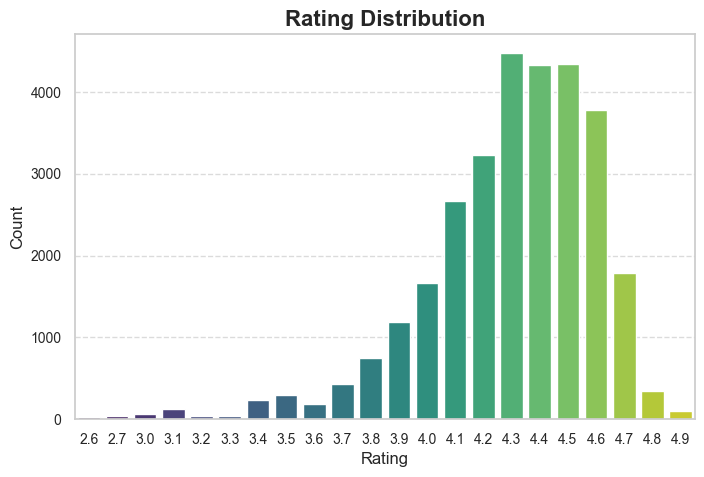

In [128]:
rating_count = data['rating'].value_counts()
# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=rating_count.index, y=rating_count.values, palette="viridis")
plt.title('Rating Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()

*Explanation:*  
From this Histogram of Rating Distribution, we know:

- The distribution is skewed towards higher ratings, with most apps receiving ratings between 4.0 and 4.7.
- The highest frequency of ratings is at 4.4, followed closely by 4.3 and 4.5, indicating that a large number of apps are rated favorably.
- Very few apps have ratings lower than 3.0, suggesting either a selection of generally well-received apps or a tendency for users to rate apps more favorably.
  
The drop in frequency for ratings 4.8 and above could indicate a standard where few apps are rated as near-perfect.
Overall, this distribution indicates a trend where users rate apps positively, with few instances of very low ratings.

## **4.5 Review Distribution**

In [129]:
data.columns

Index(['app', 'category', 'rating', 'reviews', 'size', 'installs', 'type',
       'price', 'content_rating', 'genres', 'last_updated', 'current_ver',
       'android_ver', 'translated_review', 'sentiment', 'sentiment_polarity',
       'sentiment_subjectivity'],
      dtype='object')

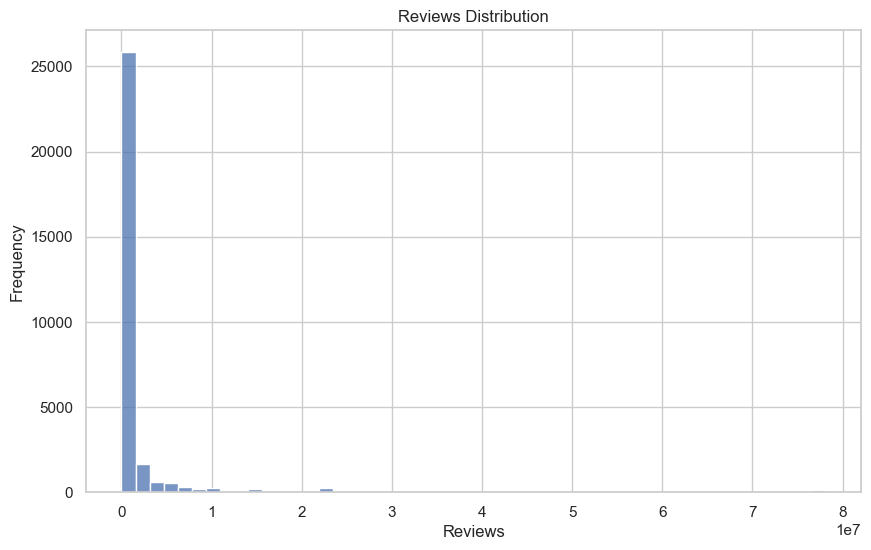

In [130]:
# Reviews Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['reviews'], bins=50, kde=False)
plt.title('Reviews Distribution')
plt.xlabel('Reviews')
plt.ylabel('Frequency')
plt.show()

*Explanation:*  
- The distribution is highly right-skewed, indicating that a large number of apps have a small number of reviews, This could be due to several reasons like new apps, or even unpopular apps, while only a few apps have a very high number of reviews. This pattern suggests that a small subset of apps is receiving the majority of the attention from users in terms of reviews.

## **4.6 Price Distribution Among Paid Apps**

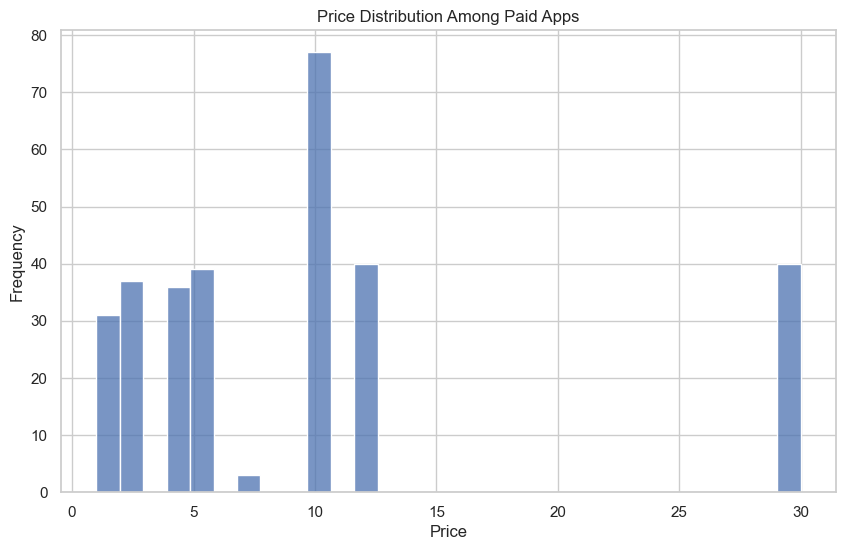

In [131]:
# Price Distribution Among Paid Apps
plt.figure(figsize=(10, 6))
sns.histplot(data[data['price'] > 0]['price'], bins=30, kde=False)
plt.title('Price Distribution Among Paid Apps')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

*Explanation:*  
- Most paid apps are priced below $10, with peaks at around the $2 and $4 price points. There are fewer apps at higher price points, indicating that lower-priced apps are more common and potentially more popular among users.

## **4.7 Rating vs Reviews**

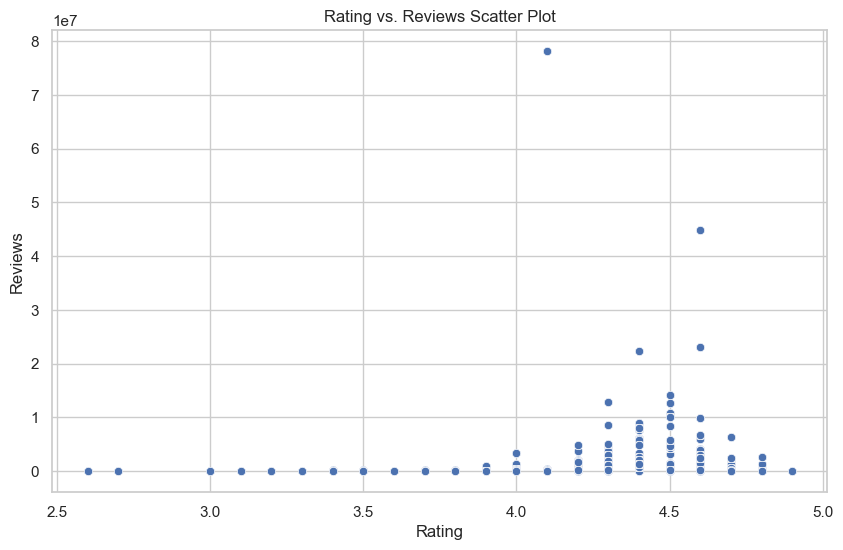

In [132]:
# Rating vs. Reviews Scatter Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='rating', y='reviews', data=data)
plt.title('Rating vs. Reviews Scatter Plot')
plt.xlabel('Rating')
plt.ylabel('Reviews')
plt.show()

*Explanation:*  
- here is a concentration of apps with high ratings and a moderate number of reviews. Very few apps have low ratings, and apps with a very high number of reviews are relatively rare. This may indicate that well-rated apps tend to receive a good number of reviews, but not all popular apps (in terms of the number of reviews) are necessarily high-rated.

## **4.8 Category Popularity**

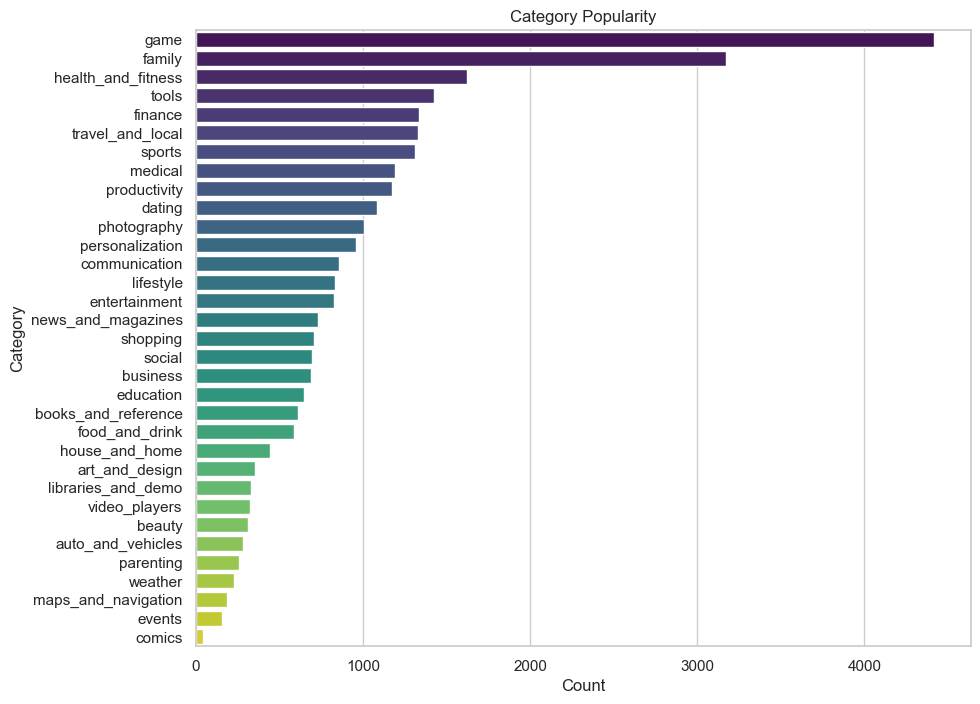

In [133]:
# Category Popularity
plt.figure(figsize=(10, 8))
sns.countplot(y='category', data=data, order=data['category'].value_counts().index, palette='viridis')
plt.title('Category Popularity')
plt.xlabel('Count')
plt.ylabel('Category')
plt.show()

*Explanation:*  
- The 'Game' category is the most populated, followed by 'Family' and 'Health & Fitness', suggesting these are the most common types of apps. Less populated categories like 'Events' and 'Comics' may represent niche markets.

## **4.9 Boxplot of Ratings by Category**

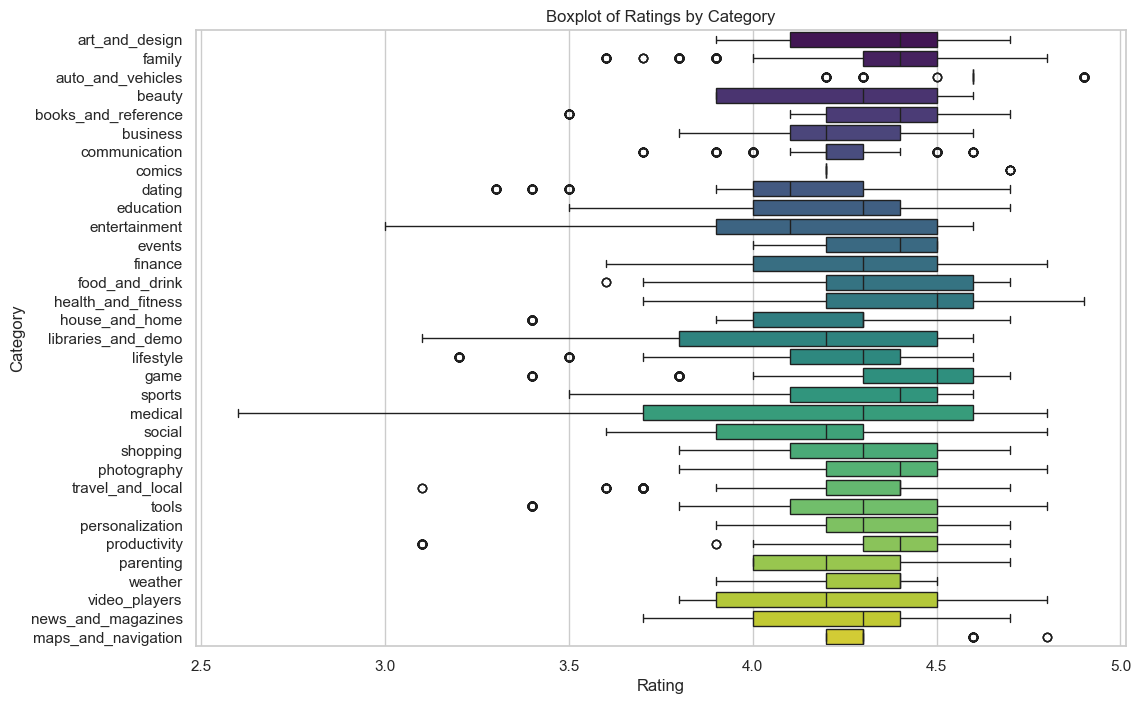

In [134]:
# Boxplot of Ratings by Category
sns.set(style="whitegrid")
plt.figure(figsize=(12, 8))
sns.boxplot(x='rating', y='category', data=data, orient='h', palette="viridis")
plt.title('Boxplot of Ratings by Category')
plt.xlabel('Rating')
plt.ylabel('Category')
plt.show()

From the boxplot, we can deduce:

- Most categories have median ratings above 4.0, indicating generally positive reception of apps across all categories.
- Some categories show a wide range of ratings (evidenced by longer boxes), indicating more variability in how users rate these apps.
- Categories with tight boxes, where Q1 and Q3 are close together, indicate more consistency in ratings.
- Outliers are present in many categories, both on the high and low ends, suggesting that there are a few apps that are rated significantly 
differently than the majority in their category.

Overall, this plot provides a comprehensive view of how apps are rated within each category, showing general user satisfaction and highlighting categories with more diverse user opinions

## **4.10 Sentiment Distribution**

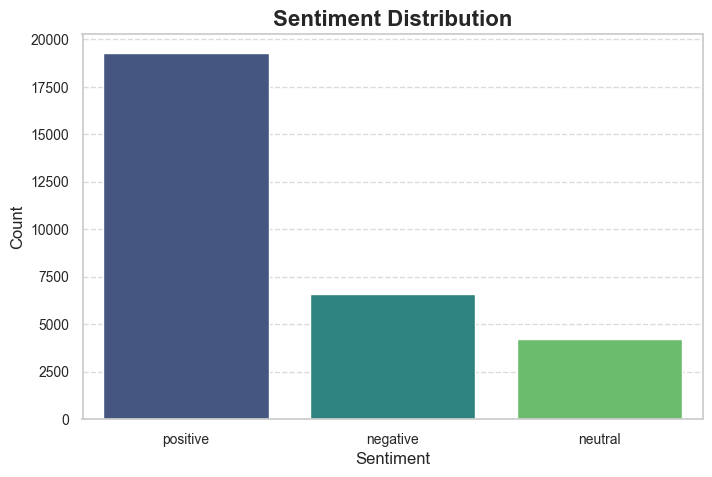

In [135]:
# Sentiment distribution
sentiment_count = data['sentiment'].value_counts()

# Plotting
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_count.index, y=sentiment_count.values, palette="viridis")
plt.title('Sentiment Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Sentiment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7) 
plt.show()

*Explanation:*  
- Based on the Sentiment Distribution Bar Chart, The 'positive' category has the highest count, exceeding 20,000 items. The 'negative' category has a lower count, roughly around 7,500 items. The 'neutral' category has the least, with just under 5,000 items. This suggests that the positive sentiment among the items being analyzed predominates significantly over negative and neutral sentiments.

## **4.11 Sentiment Polarity Analysis**

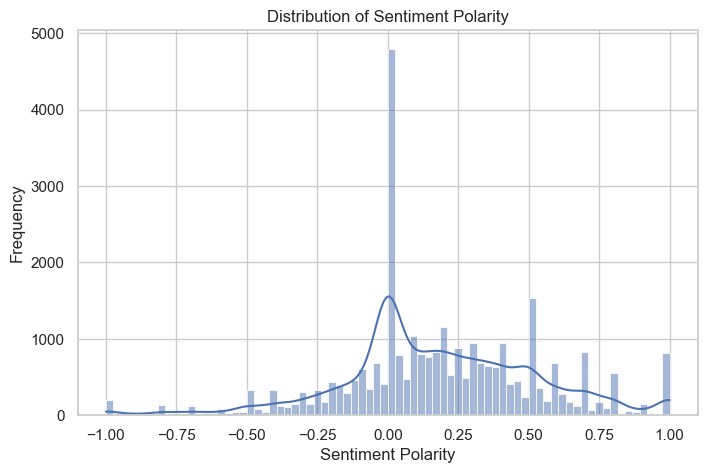

In [136]:
# Plotting
plt.figure(figsize=(8, 5))
sns.histplot(data['sentiment_polarity'], kde=True)
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

*Explanation:*  
- The chart shows a large concentration of scores around 0, indicating a high frequency of neutral sentiments. There is a notable spike at exactly 0, which is significantly higher than any other value, suggesting a large number of entries with a perfectly neutral sentiment. The distribution is somewhat bimodal, with smaller peaks in the positive range (around 0.5) and negative range (around -0.25 to -0.5), implying clusters of positive and negative sentiments as well. However, the positive sentiments appear to have a slightly wider spread with multiple smaller peaks, while negative sentiments are more concentrated around their peak.Overall, this suggests that the data contains a high volume of neutral sentiments, with a presence of both positive and negative sentiments, and a broader diversity of positive sentiment intensities.

## **4.12 Sentiment Subjectivity Analysis**

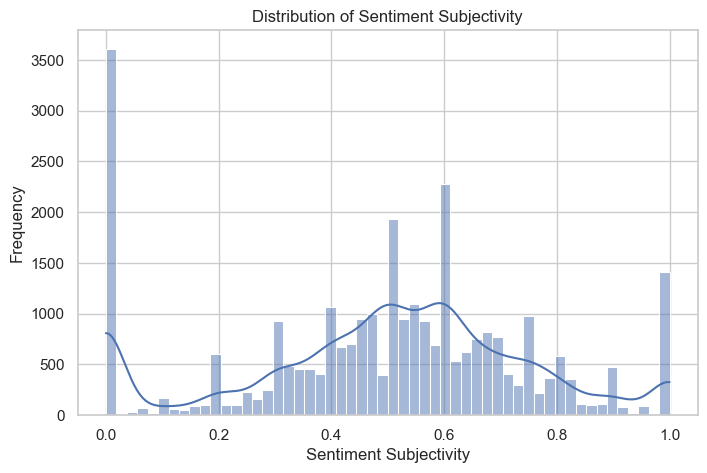

In [137]:
# Plotting
plt.figure(figsize=(8, 5))
sns.histplot(data['sentiment_subjectivity'], kde=True)
plt.title('Distribution of Sentiment Subjectivity')
plt.xlabel('Sentiment Subjectivity')
plt.ylabel('Frequency')
plt.show()

*Explanation:*
From the histogram of sentiment subjectivity, we know:  
- A high peak at 0, suggesting a significant number of texts are classified with no subjectivity, meaning they are likely to be factual or objective.
- Several moderate peaks throughout, especially noticeable around 0.2, 0.5, 0.6, and towards the higher end at 1.0.
- The peaks at 0.5 and higher indicate a considerable number of texts contain subjective opinions.

The distribution is somewhat uneven, suggesting varying levels of opinion across the dataset, with a notable amount of completely objective (or detected as such) texts and others expressing different degrees of subjectivity. The presence of multiple peaks indicates that texts do not conform to a single level of subjectivity but vary widely, which might be typical in datasets containing both factual information and personal opinions

## **4.13 Text Analysis**

In [138]:
#check text length
len(data['translated_review'])

30117

*Explanation:*  
There are 40316 individual text items in the data.

- **Word Frequency**

In [139]:
# Check word frequency
words = [word for text in data['translated_review'].dropna() for word in word_tokenize(text.lower())]

# Frequency distribution
word_freq = FreqDist(words)

# 10 most common words
print(word_freq.most_common(10))

[('.', 50752), ('i', 29999), (',', 21576), ('!', 11216), ('it', 9260), ('game', 7405), ('the', 4696), ('like', 4381), ("'s", 4347), ('good', 4146)]


- **Stop Words & Lemmatizer**

In [140]:
# Stop words 
stop_words = set(stopwords.words('english'))

# Lemmatizer
lemmatizer = WordNetLemmatizer()

In [141]:
# Pre-process text for the model
data['text_processed'] = data['translated_review'].apply(lambda x: text_preprocessing(x, lemmatizer, stop_words))
data.sample(5)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity,text_processed
26432,amino: communities and chats,social,4.8,1264084,62m,10000000,free,0.0,teen,['social'],2018-08-07,1.8.19179,4.0.3 and up,"this terrible full paedophiles, sex addicted c...",negative,-0.10,0.54,terrible full paedophile sex addicted creep fr...
29338,color touch effects,photography,3.8,167652,12m,10000000,free,0.0,everyone,['photography'],2018-04-23,4.5,4.1 and up,not impressed. used changed actual shape somet...,negative,-0.27,0.47,impressed used changed actual shape something ...
37706,bbc news,news_and_magazines,4.3,296781,varies with device,10000000,free,0.0,everyone 10+,['news & magazines'],2018-07-24,varies with device,varies with device,the reporting still bbc trustworthy main strea...,positive,0.17,0.33,reporting still bbc trustworthy main stream u ...
23829,dr. panda restaurant 3,family,4.2,11126,91m,1000000,free,0.0,everyone,"['educational', 'pretend play']",2018-03-23,1.6.4,4.1 and up,i hate it you have to pay for the food i used ...,negative,-1.00,0.90,hate pay food used like dont anymore
36347,do it later: tasks & to-dos,productivity,4.5,123412,varies with device,50000000,free,0.0,everyone,['productivity'],2018-04-13,varies with device,varies with device,best ever,positive,1.00,0.30,best ever


- **Sentiment Labeling**

In [142]:
# Integer labeling for the sentiments
def change_sentiment(value):
    if value == "negative":
        return 1
    elif value == "positive":
        return 2
    else:
        return 0

data['label'] = data['sentiment'].map(change_sentiment)
data.sample(5)

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity,text_processed,label
22076,cats: crash arena turbo stars,game,4.7,1559650,varies with device,50000000,free,0.0,everyone,['action'],2018-07-09,2.11.1,4.1 and up,"good concept. the complain i that, i think 3 a...",positive,0.26,0.50,good concept complain think ad watch open loot...,2
26421,amino: communities and chats,social,4.8,1259075,62m,10000000,free,0.0,teen,['social'],2018-07-20,1.8.19179,4.0.3 and up,this awesome! i lot. so people upload videos w...,positive,0.50,0.67,awesome lot people upload video without using ...,2
6503,food network,family,4.1,7823,varies with device,500000,free,0.0,teen,['entertainment'],2018-07-27,varies with device,varies with device,love easy favorite shows it!,positive,0.52,0.81,love easy favorite show,2
39505,fortune city - a finance app,finance,4.6,49275,91m,500000,free,0.0,everyone,['finance'],2018-07-17,2.0.3.1,4.4 and up,it's really fun cute way keep track expenses! ...,positive,0.13,0.65,'s really fun cute way keep track expense appr...,2
4462,"hide app, private dating, safe chat - privacyh...",dating,4.4,35206,7.2m,1000000,free,0.0,everyone,['dating'],2018-05-21,2.9.6,4.0 and up,it always stop every time i open goes back hom...,neutral,0.00,0.25,always stop every time open go back home screen,0


- **Length Distribution for each Sentiment**

In [143]:
def plot_length_distribution(data, sentiment_label, sentiment_name, color):
    """
    Plots the distribution of text lengths with annotations for mean and median.

    Parameters:
    - data (DataFrame): The dataset containing the text and labels.
    - sentiment_label (int): The label of the sentiment to filter the data.
    - sentiment_name (str): The name of the sentiment to be used in the title.
    - color (str): The color to use for the histogram.
    """
    # Calculate the length of each text entry for the given sentiment
    sentiment_data = data.loc[data['label'] == sentiment_label].copy()
    sentiment_data.loc[:, 'length'] = sentiment_data.text_processed.str.split().apply(len)
    
    # Calculate descriptive statistics for the given sentiment
    describe_sentiment = sentiment_data['length'].describe()
    
    # Plot the distribution of text length
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=sentiment_data, x='length', color=color)
    
    # # Annotating the mean and median on the plot
    # mean_val = describe_sentiment['mean']
    # median_val = describe_sentiment['50%']
    
    # # Set up initial annotation positions
    # mean_position = plt.ylim()[1] * 0.9
    # median_position = plt.ylim()[1] * 0.8

    # # Adjust positions if values are close to avoid overlapping
    # if abs(mean_val - median_val) < max(plt.xlim()) * 0.05:  # 5% of x-axis range as threshold
    #     median_position = mean_position * 0.7  # Further down if too close
    
    # # Mean line
    # plt.axvline(mean_val, color='k', linestyle='dashed', linewidth=1)
    # plt.text(mean_val + 0.5, mean_position, f'Mean: {mean_val:.2f}', color='black', fontsize=16)
    
    # # Median line
    # plt.axvline(median_val, color='k', linestyle='dashed', linewidth=1)
    # plt.text(median_val + 0.5, median_position, f'Median: {median_val:.2f}', color='black', fontsize=16)
    
    plt.title(f'Distribution of text length for {sentiment_name} sentiment text.', fontsize=16)
    plt.xlabel('Length')
    plt.ylabel('Count')
    
    plt.show()

In [144]:
data['text_lenght'] = data['translated_review'].apply(len)
data.iloc[0]

app                                                     coloring book moana
category                                                     art_and_design
rating                                                                  3.9
reviews                                                                 967
size                                                                    14m
installs                                                             500000
type                                                                   free
price                                                                   0.0
content_rating                                                     everyone
genres                                     ['art & design', 'pretend play']
last_updated                                                     2018-01-15
current_ver                                                           2.0.0
android_ver                                                    4.0.3 and up
translated_r

In [145]:
data['text_lenght'].describe()

count    30117.000000
mean       109.937776
std        103.804984
min          2.000000
25%         32.000000
50%         83.000000
75%        158.000000
max       2713.000000
Name: text_lenght, dtype: float64

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30117 entries, 0 to 40315
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   app                     30117 non-null  object 
 1   category                30117 non-null  object 
 2   rating                  30117 non-null  float64
 3   reviews                 30117 non-null  int64  
 4   size                    30117 non-null  object 
 5   installs                30117 non-null  int64  
 6   type                    30117 non-null  object 
 7   price                   30117 non-null  float64
 8   content_rating          30117 non-null  object 
 9   genres                  30117 non-null  object 
 10  last_updated            30117 non-null  object 
 11  current_ver             30117 non-null  object 
 12  android_ver             30117 non-null  object 
 13  translated_review       30117 non-null  object 
 14  sentiment               30117 non-null  obj

In [147]:
data.describe()
data[data['text_lenght'] > 1000]

,app,category,rating,reviews,size,installs,type,price,content_rating,genres,last_updated,current_ver,android_ver,translated_review,sentiment,sentiment_polarity,sentiment_subjectivity,text_processed,label,text_lenght
983,amazon kindle,books_and_reference,4.2,814080,varies with device,100000000,free,0.0,teen,['books & reference'],2018-07-27,varies with device,varies with device,update 28.07.18. awfull variant kindle book st...,positive,0.07,0.41,update awfull variant kindle book store back g...,2,1028
1020,amazon kindle,books_and_reference,4.2,814080,varies with device,100000000,free,0.0,teen,['books & reference'],2018-07-27,varies with device,varies with device,7/26: i realized phone allows choose sd storag...,positive,0.07,0.46,realized phone allows choose sd storage phone ...,2,1116
3070,chrome dev,communication,4.4,63543,varies with device,5000000,free,0.0,everyone,['communication'],2018-08-02,69.0.3497.24,varies with device,"»too bright!… night mode, please. how many req...",negative,-0.08,0.54,bright night mode please many request y'all ne...,1,2713
4632,gay sugar daddy dating & hookup – sudy gay,dating,4.1,2212,41m,100000,free,0.0,mature 17+,['dating'],2018-06-20,2.0.5,4.0.3 and up,"well,i would give 0 could. first,you message a...",positive,0.11,0.53,well would give could first message anyone pay...,2,1007
25670,free hypnosis,medical,4.2,4303,varies with device,100000,free,0.0,everyone,['medical'],2016-09-06,varies with device,varies with device,"he's amazingly gifted, caring, enlightening, u...",positive,0.32,0.61,'s amazingly gifted caring enlightening uplift...,2,1014
30310,golf gps rangefinder: golf pad,sports,4.6,13098,varies with device,1000000,free,0.0,everyone,['sports'],2018-07-28,varies with device,varies with device,i love app. i third year using - first year fr...,positive,0.28,0.45,love app third year using first year free vers...,2,1143
30851,hopper - watch & book flights,travel_and_local,4.4,52029,varies with device,5000000,free,0.0,everyone,['travel & local'],2018-06-29,varies with device,5.0 and up,i got burnt putting trust hopper predict best ...,positive,0.16,0.49,got burnt putting trust hopper predict best pr...,2,1216


(0.0, 1000.0)

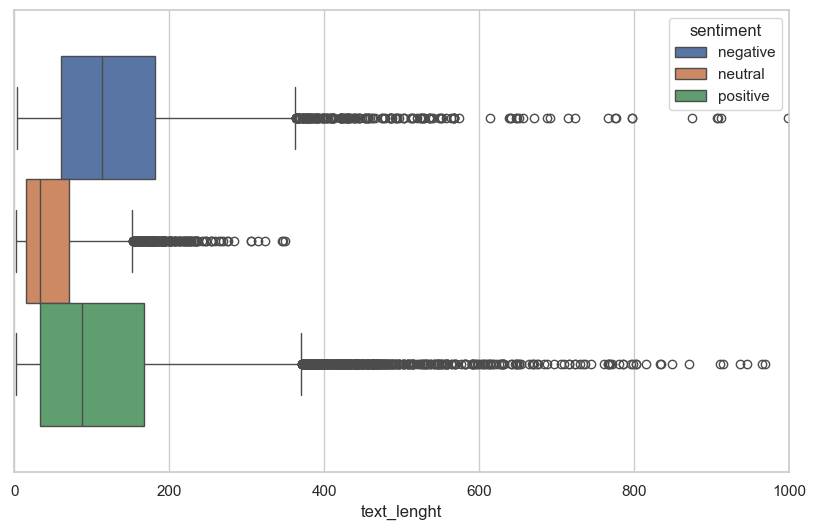

In [158]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='text_lenght', hue='sentiment')
plt.xlim(0,1000)

In [149]:
pd.reset_option('display.max_colwidth')

In [150]:
negative = data[data['sentiment']=='negative']
negative['text_lenght'] = negative['translated_review'].apply(len)
negative.iloc[0]

app                                                     coloring book moana
category                                                     art_and_design
rating                                                                  3.9
reviews                                                                 967
size                                                                    14m
installs                                                             500000
type                                                                   free
price                                                                   0.0
content_rating                                                     everyone
genres                                     ['art & design', 'pretend play']
last_updated                                                     2018-01-15
current_ver                                                           2.0.0
android_ver                                                    4.0.3 and up
translated_r

In [151]:
a = negative.iloc[0]['translated_review']
print(a)
len(a)

a kid's excessive ads. the types ads allowed app, let alone kids


64

- **Wordcloud**

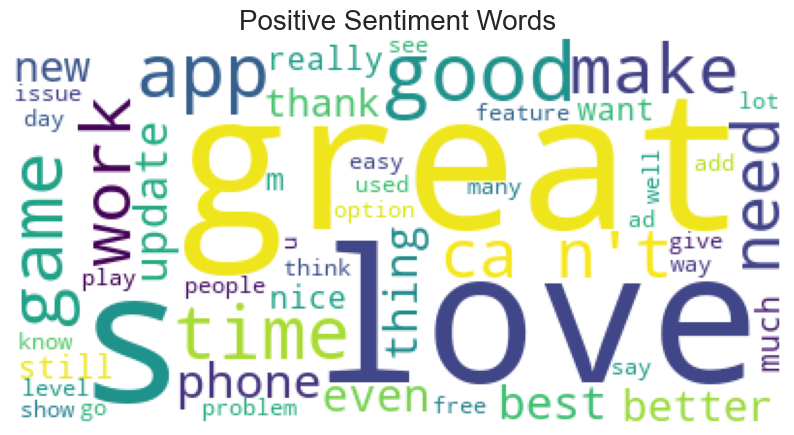

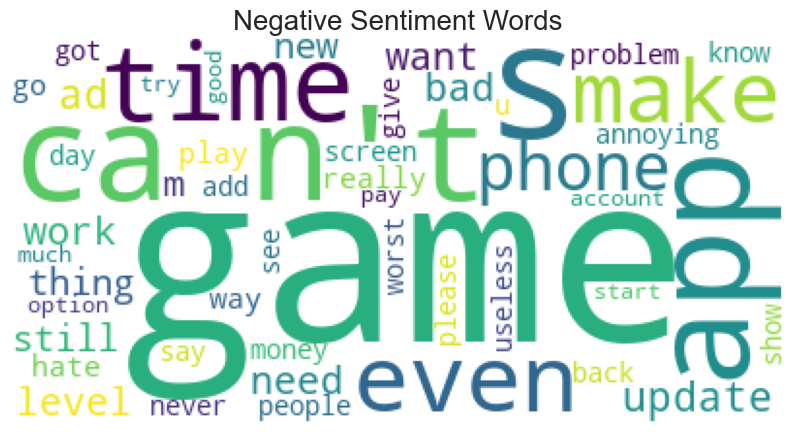

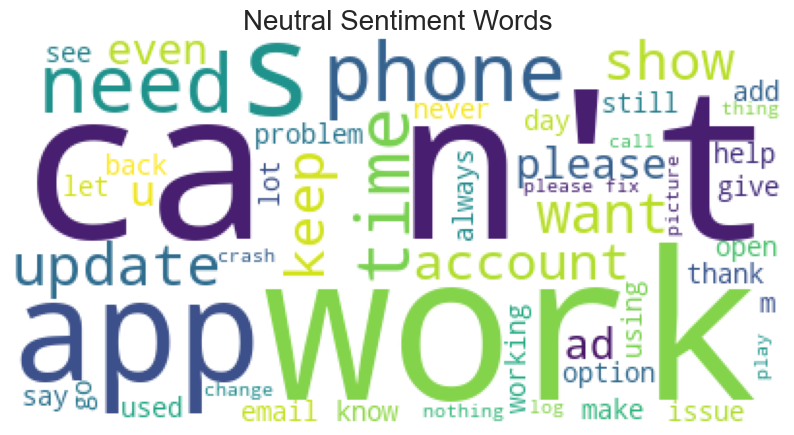

In [155]:
def wordcount_gen(data, label):
    combined_reviews = " ".join([text for text in data[data.label==label]['text_processed']])
    wc = WordCloud(background_color='white',
                   max_words=50,
                   stopwords = STOPWORDS)
    if label == 2:
        sentiment = 'Positive'
    elif label == 1:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'

    plt.figure(figsize=(10,10))
    plt.imshow(wc.generate(combined_reviews))
    plt.title('{} Sentiment Words'.format(sentiment), fontsize=20)
    plt.axis('off')
    plt.show()

# Positive
wordcount_gen(data, 2)

# Negative
wordcount_gen(data, 1)

# Neutral
wordcount_gen(data, 0)

# **Conclusion EDA:**  

***Rating Distribution***: 
- The majority of apps have high ratings, predominantly between 4.0 and 4.7, with 4.4 being the most common. This suggests users are generally satisfied with the apps they use or that there is a positive skew in the way users rate apps.

***Reviews Distribution***: 
- The distribution of reviews is highly skewed towards the lower end, meaning most apps have a relatively small number of reviews, while a few have very large numbers. This is typical in app markets where a small number of popular apps dominate.

***Price Distribution Among Paid Apps***: 
- Most paid apps are priced below $10, with peaks at around the $2 and $4 price points. There are fewer apps at higher price points, indicating that lower-priced apps are more common and potentially more popular among users.

***Rating vs. Reviews Scatter Plot***: 
- There is a concentration of apps with high ratings and a moderate number of reviews. Very few apps have low ratings, and apps with a very high number of reviews are relatively rare. This may indicate that well-rated apps tend to receive a good number of reviews, but not all popular apps (in terms of the number of reviews) are necessarily high-rated.

***Category Popularity***: 
- The 'Game' category is the most populated, followed by 'Family' and 'Health & Fitness', suggesting these are the most common types of apps. Less populated categories like 'Events' and 'Comics' may represent niche markets.

***Boxplot Rating by Category*** : 
- the boxplot demonstrates that apps are generally well-received across various categories with most median ratings above 4.0. Categories with wider boxes suggest a greater disparity in user ratings, while those with narrower boxes indicate more consistent ratings. The presence of outliers shows that there are exceptions where apps receive ratings that greatly differ from the norm within their category. Overall, this visualization underscores a predominantly positive user experience with noticeable variations in some categories.

***Sentiment Distribution***: 
- Positive sentiments are significantly more common than negative or neutral ones, which could indicate either a genuinely positive user experience or a tendency to leave feedback when satisfied rather than dissatisfied.

***Distribution of Sentiment Polarity***: 
- The multi-modal distribution shows that while many reviews are neutral (polarity around 0), there are also noticeable amounts of positive (polarity > 0) and negative (polarity < 0) reviews. The presence of sharp peaks at specific polarities may suggest common sentiment patterns among users.

***Distribution of Sentiment Subjectivity***: 
- The distribution is quite uniform with multiple peaks, indicating that the dataset contains a mix of opinions and factual information. There is a notable number of entries with high subjectivity, signifying personal opinions, and a significant number with low subjectivity, indicating objective statements.

***Text Length by Sentiment***: 
- The distribution of text length for reviews shows that neutral sentiment texts are generally shorter, with a mean length of around 7 words and a median of 5 words. Positive sentiment texts are longer, with a mean of approximately 19 words and a median of 17 words, while negative sentiment texts have a mean length close to 17 words and a median of 14 words. This could indicate that users tend to be more verbose when expressing positive or negative sentiments, while neutral comments are more concise.

***Word Clouds***: 
- The word clouds for positive, negative, and neutral sentiments highlight the most frequently used words in each category. For positive sentiments, words like "love," "great," "good," and "best" dominate, reflecting strong satisfaction. Negative sentiment texts frequently include words like "bad," "problem," "worst," and "annoying," pointing to dissatisfaction. Neutral sentiment texts feature words like "update," "phone," and "app," which may relate to more factual or inquiry-based content rather than opinion.

In summary, the dataset indicates a positive user interaction with apps, with a tendency towards higher ratings and positive sentiments. The reviews are highly skewed, suggesting that a small subset of apps garners most user feedback. Price distribution for paid apps shows a preference for lower-priced options, and app categories reveal a strong preference for games and family-oriented apps. Sentiment analysis reveals a tendency for reviews to express moderate to strong opinions, with a significant presence of neutral sentiment reflecting factual statements.

In [ ]:
df = dwadhwoadu

# **5. FEATURE ENGINEERING**

### Split Data

In [ ]:
# data splitting
X_train_val, X_test, y_train_val, y_test = train_test_split(data.text_processed,
                                                            data.label,
                                                            test_size=0.15,
                                                            random_state=20,
                                                            stratify=data.label)

X_train, X_val, y_train, y_val = train_test_split(X_train_val,
                                                  y_train_val,
                                                  test_size=0.10,
                                                  random_state=20,
                                                  stratify=y_train_val)

print('Train Size : ', X_train.shape)
print('Val Size   : ', X_val.shape)
print('Test Size  : ', X_test.shape)

Train Size :  (30841,)
Val Size   :  (3427,)
Test Size  :  (6048,)


#### Vectorization

In [ ]:
Vectorize = CountVectorizer()
X_train_vec = Vectorize.fit_transform(X_train)
X_test_vec = Vectorize.transform(X_test)

X_train_vec.shape, X_test_vec.shape

((30841, 15759), (6048, 15759))

In [ ]:
# Vocab and sentence length
total_vocab = len(Vectorize.vocabulary_.keys())
max_sen_len = max([len(i.split(" ")) for i in X_train])

print('Total Vocab : ', total_vocab)
print('Maximum Sentence Length : ', max_sen_len, 'tokens')

Total Vocab :  15759
Maximum Sentence Length :  320 tokens


In [ ]:
# text vectorization
text_vectorization = TextVectorization(max_tokens=total_vocab,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=max_sen_len,
                                       input_shape=(1,))
text_vectorization.adapt(X_train)

2023-12-03 11:13:17.864117: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-03 11:13:17.887550: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-03 11:13:17.887631: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-03 11:13:17.890175: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:880] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2023-12-03 11:13:17.890306: I tensorflow/compile

In [ ]:
# Top 20 tokens
text_vectorization.get_vocabulary()[:20]

['',
 '[UNK]',
 'game',
 'time',
 'like',
 'get',
 's',
 'good',
 'great',
 'love',
 'app',
 'ad',
 'nt',
 'would',
 'really',
 'update',
 'work',
 'play',
 'make',
 'even']

#### Embedding

In [ ]:
# Embedding
embedding = Embedding(input_dim=total_vocab,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=max_sen_len)
# embedding

#### Results

In [ ]:
## Document example
print('Document example')
print(data.text_processed[1])
print('')

## Result of Text Vectorization
print('Result of  Text Vectorization')
print(text_vectorization([data.text_processed[0]]))
print('Vector size : ', text_vectorization([data.text_processed[0]]).shape)
print('')

## Result of  Embedding
print('Result of  Embedding')
print(embedding(text_vectorization([data.text_processed[0]])))
print('Vector size : ', embedding(text_vectorization([data.text_processed[0]])).shape)

Document example
bad

Result of  Text Vectorization
tf.Tensor(
[[ 378    6 3425   11  344   11 1084   10   97 1309  378    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
 

# **6. MODEL DEFINITION**

In [ ]:
# Global seed
seed = 2
np.random.seed(2)
tf.random.set_seed(2)

#### LSTM

In [ ]:
tf.keras.backend.clear_session()

model_lstm_reg = Sequential([
    text_vectorization,
    embedding,
    Bidirectional(LSTM(256, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))),
    Dropout(0.2),
    Bidirectional(LSTM(128, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))),
    Dropout(0.3),
    Bidirectional(LSTM(64, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))),
    Dropout(0.5),
    Dense(1, activation='linear')
], name='LSTM')
model_lstm_reg.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Model summary
model_lstm_reg.summary()

# Model checkpoint
lstm_checkpoint = ModelCheckpoint('lstm', monitor='val_mean_absolute_error', verbose=1, save_best_only=True, mode='min')

Model: "LSTM"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 320)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 320, 128)          2017152   
                                                                 
 bidirectional (Bidirection  (None, 320, 512)          788480    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 320, 512)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 320, 256)          656384    
 onal)                                                           
                                                              

#### CNN

In [ ]:
tf.keras.backend.clear_session()

model_cnn_reg = Sequential([
    text_vectorization,
    embedding,
    Conv1D(filters=256, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=128, kernel_size=4, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2),
    Conv1D(filters=64, kernel_size=5, activation='relu', padding='same'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(1, activation='linear')
], name='CNN')
model_cnn_reg.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Model summary
model_cnn_reg.summary()

# Model checkpoint
cnn_checkpoint = ModelCheckpoint('cnn', monitor='val_mean_absolute_error', verbose=1, save_best_only=True, mode='min')

Model: "CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 320)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 320, 128)          2017152   
                                                                 
 conv1d (Conv1D)             (None, 320, 256)          98560     
                                                                 
 max_pooling1d (MaxPooling1  (None, 160, 256)          0         
 D)                                                              
                                                                 
 conv1d_1 (Conv1D)           (None, 160, 128)          131200    
                                                                 
 max_pooling1d_1 (MaxPoolin  (None, 80, 128)           0       

#### GRU

In [ ]:
tf.keras.backend.clear_session()

model_gru_reg = Sequential([
    text_vectorization,
    embedding,
    Bidirectional(GRU(256, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))),
    Dropout(0.3),
    Bidirectional(GRU(128, return_sequences=True, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))),
    Dropout(0.3),
    Bidirectional(GRU(64, kernel_initializer=tf.keras.initializers.GlorotUniform(seed))),
    Dropout(0.5),
    Dense(1, activation='linear')
], name='GRU')
model_gru_reg.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])

# Model summary
model_gru_reg.summary()

# Model checkpoint
gru_checkpoint = ModelCheckpoint('gru', monitor='val_mean_absolute_error', verbose=1, save_best_only=True, mode='min')

Model: "GRU"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVe  (None, 320)               0         
 ctorization)                                                    
                                                                 
 embedding (Embedding)       (None, 320, 128)          2017152   
                                                                 
 bidirectional (Bidirection  (None, 320, 512)          592896    
 al)                                                             
                                                                 
 dropout (Dropout)           (None, 320, 512)          0         
                                                                 
 bidirectional_1 (Bidirecti  (None, 320, 256)          493056    
 onal)                                                           
                                                               

# **7. MODEL TRAINING**

In [ ]:
# Early stopping
es = EarlyStopping(monitor='val_mean_absolute_error', patience=20, verbose=1, restore_best_weights=True)

# Reduce Learning Rate
rlr = ReduceLROnPlateau(monitor='val_mean_absolute_error', factor=0.1, patience=5, verbose=1, min_lr=0.00001)

#### LSTM

In [ ]:
# Model LSTM
lstm_result = model_lstm_reg.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=64,
    validation_data=(X_val, y_val), 
    callbacks=[lstm_checkpoint, es, rlr]
)

Epoch 1/50


2023-12-03 11:37:42.271809: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:442] Loaded cuDNN version 8800
2023-12-03 11:37:44.170372: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f392c010a00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-03 11:37:44.170420: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2023-12-03 11:37:44.177792: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-03 11:37:44.261391: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


482/482 [==============================] - ETA: 0s - loss: 0.2946 - mean_absolute_error: 0.4102
Epoch 1: val_mean_absolute_error improved from inf to 0.23298, saving model to lstm
INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


482/482 [==============================] - 108s 196ms/step - loss: 0.2946 - mean_absolute_error: 0.4102 - val_loss: 0.1291 - val_mean_absolute_error: 0.2330 - lr: 0.0010
Epoch 2/50
482/482 [==============================] - ETA: 0s - loss: 0.1126 - mean_absolute_error: 0.2244
Epoch 2: val_mean_absolute_error improved from 0.23298 to 0.13790, saving model to lstm
INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


482/482 [==============================] - 81s 167ms/step - loss: 0.1126 - mean_absolute_error: 0.2244 - val_loss: 0.1018 - val_mean_absolute_error: 0.1379 - lr: 0.0010
Epoch 3/50
482/482 [==============================] - ETA: 0s - loss: 0.0813 - mean_absolute_error: 0.1836
Epoch 3: val_mean_absolute_error improved from 0.13790 to 0.13588, saving model to lstm
INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


482/482 [==============================] - 80s 166ms/step - loss: 0.0813 - mean_absolute_error: 0.1836 - val_loss: 0.1006 - val_mean_absolute_error: 0.1359 - lr: 0.0010
Epoch 4/50
482/482 [==============================] - ETA: 0s - loss: 0.0676 - mean_absolute_error: 0.1650
Epoch 4: val_mean_absolute_error improved from 0.13588 to 0.10505, saving model to lstm
INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


482/482 [==============================] - 80s 165ms/step - loss: 0.0676 - mean_absolute_error: 0.1650 - val_loss: 0.0923 - val_mean_absolute_error: 0.1050 - lr: 0.0010
Epoch 5/50
482/482 [==============================] - ETA: 0s - loss: 0.0621 - mean_absolute_error: 0.1547
Epoch 5: val_mean_absolute_error did not improve from 0.10505
482/482 [==============================] - 51s 106ms/step - loss: 0.0621 - mean_absolute_error: 0.1547 - val_loss: 0.1008 - val_mean_absolute_error: 0.1357 - lr: 0.0010
Epoch 6/50
482/482 [==============================] - ETA: 0s - loss: 0.0561 - mean_absolute_error: 0.1452
Epoch 6: val_mean_absolute_error did not improve from 0.10505
482/482 [==============================] - 51s 106ms/step - loss: 0.0561 - mean_absolute_error: 0.1452 - val_loss: 0.0997 - val_mean_absolute_error: 0.1133 - lr: 0.0010
Epoch 7/50
482/482 [==============================] - ETA: 0s - loss: 0.0480 - mean_absolute_error: 0.1332
Epoch 7: val_mean_absolute_error did not improve

INFO:tensorflow:Assets written to: lstm/assets


482/482 [==============================] - 80s 165ms/step - loss: 0.0427 - mean_absolute_error: 0.1216 - val_loss: 0.0863 - val_mean_absolute_error: 0.0943 - lr: 0.0010
Epoch 10/50
482/482 [==============================] - ETA: 0s - loss: 0.0400 - mean_absolute_error: 0.1161
Epoch 10: val_mean_absolute_error did not improve from 0.09427
482/482 [==============================] - 52s 107ms/step - loss: 0.0400 - mean_absolute_error: 0.1161 - val_loss: 0.0917 - val_mean_absolute_error: 0.1088 - lr: 0.0010
Epoch 11/50
482/482 [==============================] - ETA: 0s - loss: 0.0368 - mean_absolute_error: 0.1113
Epoch 11: val_mean_absolute_error improved from 0.09427 to 0.09380, saving model to lstm
INFO:tensorflow:Assets written to: lstm/assets


INFO:tensorflow:Assets written to: lstm/assets


482/482 [==============================] - 80s 167ms/step - loss: 0.0368 - mean_absolute_error: 0.1113 - val_loss: 0.0969 - val_mean_absolute_error: 0.0938 - lr: 0.0010
Epoch 12/50
482/482 [==============================] - ETA: 0s - loss: 0.0365 - mean_absolute_error: 0.1091
Epoch 12: val_mean_absolute_error did not improve from 0.09380
482/482 [==============================] - 50s 104ms/step - loss: 0.0365 - mean_absolute_error: 0.1091 - val_loss: 0.0933 - val_mean_absolute_error: 0.1172 - lr: 0.0010
Epoch 13/50
482/482 [==============================] - ETA: 0s - loss: 0.0340 - mean_absolute_error: 0.1052
Epoch 13: val_mean_absolute_error did not improve from 0.09380
482/482 [==============================] - 50s 104ms/step - loss: 0.0340 - mean_absolute_error: 0.1052 - val_loss: 0.0863 - val_mean_absolute_error: 0.1090 - lr: 0.0010
Epoch 14/50
482/482 [==============================] - ETA: 0s - loss: 0.0307 - mean_absolute_error: 0.1008
Epoch 14: val_mean_absolute_error did not i

INFO:tensorflow:Assets written to: lstm/assets


482/482 [==============================] - 77s 161ms/step - loss: 0.0262 - mean_absolute_error: 0.0921 - val_loss: 0.0845 - val_mean_absolute_error: 0.0854 - lr: 1.0000e-04
Epoch 18/50
482/482 [==============================] - ETA: 0s - loss: 0.0235 - mean_absolute_error: 0.0882
Epoch 18: val_mean_absolute_error did not improve from 0.08542
482/482 [==============================] - 49s 102ms/step - loss: 0.0235 - mean_absolute_error: 0.0882 - val_loss: 0.0840 - val_mean_absolute_error: 0.0979 - lr: 1.0000e-04
Epoch 19/50
482/482 [==============================] - ETA: 0s - loss: 0.0224 - mean_absolute_error: 0.0866
Epoch 19: val_mean_absolute_error did not improve from 0.08542
482/482 [==============================] - 49s 102ms/step - loss: 0.0224 - mean_absolute_error: 0.0866 - val_loss: 0.0837 - val_mean_absolute_error: 0.0901 - lr: 1.0000e-04
Epoch 20/50
482/482 [==============================] - ETA: 0s - loss: 0.0218 - mean_absolute_error: 0.0858
Epoch 20: val_mean_absolute_err

INFO:tensorflow:Assets written to: lstm/assets


482/482 [==============================] - 78s 162ms/step - loss: 0.0212 - mean_absolute_error: 0.0843 - val_loss: 0.0849 - val_mean_absolute_error: 0.0829 - lr: 1.0000e-04
Epoch 23/50
482/482 [==============================] - ETA: 0s - loss: 0.0209 - mean_absolute_error: 0.0840
Epoch 23: val_mean_absolute_error did not improve from 0.08288
482/482 [==============================] - 51s 106ms/step - loss: 0.0209 - mean_absolute_error: 0.0840 - val_loss: 0.0840 - val_mean_absolute_error: 0.0882 - lr: 1.0000e-04
Epoch 24/50
482/482 [==============================] - ETA: 0s - loss: 0.0204 - mean_absolute_error: 0.0834
Epoch 24: val_mean_absolute_error did not improve from 0.08288
482/482 [==============================] - 51s 105ms/step - loss: 0.0204 - mean_absolute_error: 0.0834 - val_loss: 0.0849 - val_mean_absolute_error: 0.0871 - lr: 1.0000e-04
Epoch 25/50
482/482 [==============================] - ETA: 0s - loss: 0.0204 - mean_absolute_error: 0.0830
Epoch 25: val_mean_absolute_err

#### CNN

In [ ]:
# Model CNN
cnn_result = model_cnn_reg.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=64, 
    validation_data=(X_val, y_val),
    callbacks=[cnn_checkpoint, es, rlr]
)

Epoch 1/50
482/482 [==============================] - ETA: 0s - loss: 0.2159 - mean_absolute_error: 0.3548
Epoch 1: val_mean_absolute_error improved from inf to 0.21094, saving model to cnn
INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


482/482 [==============================] - 35s 64ms/step - loss: 0.2159 - mean_absolute_error: 0.3548 - val_loss: 0.1145 - val_mean_absolute_error: 0.2109 - lr: 0.0010
Epoch 2/50
481/482 [============================>.] - ETA: 0s - loss: 0.1262 - mean_absolute_error: 0.2713
Epoch 2: val_mean_absolute_error did not improve from 0.21094
482/482 [==============================] - 11s 24ms/step - loss: 0.1262 - mean_absolute_error: 0.2714 - val_loss: 0.1115 - val_mean_absolute_error: 0.2226 - lr: 0.0010
Epoch 3/50
479/482 [============================>.] - ETA: 0s - loss: 0.0998 - mean_absolute_error: 0.2416
Epoch 3: val_mean_absolute_error improved from 0.21094 to 0.18822, saving model to cnn
INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


482/482 [==============================] - 11s 23ms/step - loss: 0.0998 - mean_absolute_error: 0.2416 - val_loss: 0.1046 - val_mean_absolute_error: 0.1882 - lr: 0.0010
Epoch 4/50
479/482 [============================>.] - ETA: 0s - loss: 0.0831 - mean_absolute_error: 0.2209
Epoch 4: val_mean_absolute_error did not improve from 0.18822
482/482 [==============================] - 9s 19ms/step - loss: 0.0831 - mean_absolute_error: 0.2210 - val_loss: 0.0983 - val_mean_absolute_error: 0.1914 - lr: 0.0010
Epoch 5/50
482/482 [==============================] - ETA: 0s - loss: 0.0720 - mean_absolute_error: 0.2040
Epoch 5: val_mean_absolute_error improved from 0.18822 to 0.17404, saving model to cnn
INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


482/482 [==============================] - 10s 20ms/step - loss: 0.0720 - mean_absolute_error: 0.2040 - val_loss: 0.0943 - val_mean_absolute_error: 0.1740 - lr: 0.0010
Epoch 6/50
479/482 [============================>.] - ETA: 0s - loss: 0.0630 - mean_absolute_error: 0.1879
Epoch 6: val_mean_absolute_error did not improve from 0.17404
482/482 [==============================] - 9s 18ms/step - loss: 0.0630 - mean_absolute_error: 0.1879 - val_loss: 0.1017 - val_mean_absolute_error: 0.1910 - lr: 0.0010
Epoch 7/50
479/482 [============================>.] - ETA: 0s - loss: 0.0542 - mean_absolute_error: 0.1720
Epoch 7: val_mean_absolute_error improved from 0.17404 to 0.15533, saving model to cnn
INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


482/482 [==============================] - 10s 20ms/step - loss: 0.0544 - mean_absolute_error: 0.1721 - val_loss: 0.0916 - val_mean_absolute_error: 0.1553 - lr: 0.0010
Epoch 8/50
479/482 [============================>.] - ETA: 0s - loss: 0.0488 - mean_absolute_error: 0.1581
Epoch 8: val_mean_absolute_error did not improve from 0.15533
482/482 [==============================] - 8s 17ms/step - loss: 0.0489 - mean_absolute_error: 0.1581 - val_loss: 0.1011 - val_mean_absolute_error: 0.1801 - lr: 0.0010
Epoch 9/50
482/482 [==============================] - ETA: 0s - loss: 0.0453 - mean_absolute_error: 0.1507
Epoch 9: val_mean_absolute_error improved from 0.15533 to 0.15417, saving model to cnn
INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


482/482 [==============================] - 10s 20ms/step - loss: 0.0453 - mean_absolute_error: 0.1507 - val_loss: 0.0967 - val_mean_absolute_error: 0.1542 - lr: 0.0010
Epoch 10/50
481/482 [============================>.] - ETA: 0s - loss: 0.0435 - mean_absolute_error: 0.1478
Epoch 10: val_mean_absolute_error improved from 0.15417 to 0.15108, saving model to cnn
INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


482/482 [==============================] - 11s 23ms/step - loss: 0.0435 - mean_absolute_error: 0.1478 - val_loss: 0.0985 - val_mean_absolute_error: 0.1511 - lr: 0.0010
Epoch 11/50
482/482 [==============================] - ETA: 0s - loss: 0.0406 - mean_absolute_error: 0.1446
Epoch 11: val_mean_absolute_error did not improve from 0.15108
482/482 [==============================] - 9s 20ms/step - loss: 0.0406 - mean_absolute_error: 0.1446 - val_loss: 0.1010 - val_mean_absolute_error: 0.1757 - lr: 0.0010
Epoch 12/50
481/482 [============================>.] - ETA: 0s - loss: 0.0391 - mean_absolute_error: 0.1419
Epoch 12: val_mean_absolute_error improved from 0.15108 to 0.13694, saving model to cnn
INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


482/482 [==============================] - 10s 21ms/step - loss: 0.0391 - mean_absolute_error: 0.1418 - val_loss: 0.0997 - val_mean_absolute_error: 0.1369 - lr: 0.0010
Epoch 13/50
482/482 [==============================] - ETA: 0s - loss: 0.0383 - mean_absolute_error: 0.1402
Epoch 13: val_mean_absolute_error did not improve from 0.13694
482/482 [==============================] - 9s 18ms/step - loss: 0.0383 - mean_absolute_error: 0.1402 - val_loss: 0.0987 - val_mean_absolute_error: 0.1518 - lr: 0.0010
Epoch 14/50
481/482 [============================>.] - ETA: 0s - loss: 0.0366 - mean_absolute_error: 0.1381
Epoch 14: val_mean_absolute_error improved from 0.13694 to 0.13636, saving model to cnn
INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


482/482 [==============================] - 10s 20ms/step - loss: 0.0366 - mean_absolute_error: 0.1381 - val_loss: 0.0979 - val_mean_absolute_error: 0.1364 - lr: 0.0010
Epoch 15/50
480/482 [============================>.] - ETA: 0s - loss: 0.0352 - mean_absolute_error: 0.1363
Epoch 15: val_mean_absolute_error did not improve from 0.13636
482/482 [==============================] - 8s 17ms/step - loss: 0.0352 - mean_absolute_error: 0.1363 - val_loss: 0.1074 - val_mean_absolute_error: 0.1451 - lr: 0.0010
Epoch 16/50
482/482 [==============================] - ETA: 0s - loss: 0.0351 - mean_absolute_error: 0.1353
Epoch 16: val_mean_absolute_error did not improve from 0.13636
482/482 [==============================] - 9s 18ms/step - loss: 0.0351 - mean_absolute_error: 0.1353 - val_loss: 0.1063 - val_mean_absolute_error: 0.1444 - lr: 0.0010
Epoch 17/50
481/482 [============================>.] - ETA: 0s - loss: 0.0337 - mean_absolute_error: 0.1330
Epoch 17: val_mean_absolute_error did not improv

INFO:tensorflow:Assets written to: cnn/assets


482/482 [==============================] - 10s 21ms/step - loss: 0.0339 - mean_absolute_error: 0.1337 - val_loss: 0.1045 - val_mean_absolute_error: 0.1360 - lr: 0.0010
Epoch 19/50
482/482 [==============================] - ETA: 0s - loss: 0.0333 - mean_absolute_error: 0.1322
Epoch 19: val_mean_absolute_error did not improve from 0.13604
482/482 [==============================] - 8s 18ms/step - loss: 0.0333 - mean_absolute_error: 0.1322 - val_loss: 0.1042 - val_mean_absolute_error: 0.1469 - lr: 0.0010
Epoch 20/50
480/482 [============================>.] - ETA: 0s - loss: 0.0336 - mean_absolute_error: 0.1319
Epoch 20: val_mean_absolute_error did not improve from 0.13604
482/482 [==============================] - 8s 17ms/step - loss: 0.0336 - mean_absolute_error: 0.1319 - val_loss: 0.1010 - val_mean_absolute_error: 0.1429 - lr: 0.0010
Epoch 21/50
481/482 [============================>.] - ETA: 0s - loss: 0.0331 - mean_absolute_error: 0.1310
Epoch 21: val_mean_absolute_error did not improv

INFO:tensorflow:Assets written to: cnn/assets


482/482 [==============================] - 9s 19ms/step - loss: 0.0296 - mean_absolute_error: 0.1236 - val_loss: 0.0996 - val_mean_absolute_error: 0.1326 - lr: 1.0000e-04
Epoch 26/50
480/482 [============================>.] - ETA: 0s - loss: 0.0296 - mean_absolute_error: 0.1237
Epoch 26: val_mean_absolute_error did not improve from 0.13257
482/482 [==============================] - 9s 18ms/step - loss: 0.0296 - mean_absolute_error: 0.1236 - val_loss: 0.0994 - val_mean_absolute_error: 0.1395 - lr: 1.0000e-04
Epoch 27/50
481/482 [============================>.] - ETA: 0s - loss: 0.0290 - mean_absolute_error: 0.1226
Epoch 27: val_mean_absolute_error improved from 0.13257 to 0.13001, saving model to cnn
INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


482/482 [==============================] - 9s 20ms/step - loss: 0.0290 - mean_absolute_error: 0.1226 - val_loss: 0.0984 - val_mean_absolute_error: 0.1300 - lr: 1.0000e-04
Epoch 28/50
480/482 [============================>.] - ETA: 0s - loss: 0.0288 - mean_absolute_error: 0.1221
Epoch 28: val_mean_absolute_error did not improve from 0.13001
482/482 [==============================] - 8s 16ms/step - loss: 0.0288 - mean_absolute_error: 0.1221 - val_loss: 0.0989 - val_mean_absolute_error: 0.1309 - lr: 1.0000e-04
Epoch 29/50
482/482 [==============================] - ETA: 0s - loss: 0.0285 - mean_absolute_error: 0.1220
Epoch 29: val_mean_absolute_error did not improve from 0.13001
482/482 [==============================] - 8s 16ms/step - loss: 0.0285 - mean_absolute_error: 0.1220 - val_loss: 0.0986 - val_mean_absolute_error: 0.1370 - lr: 1.0000e-04
Epoch 30/50
481/482 [============================>.] - ETA: 0s - loss: 0.0286 - mean_absolute_error: 0.1213
Epoch 30: val_mean_absolute_error imp

INFO:tensorflow:Assets written to: cnn/assets


482/482 [==============================] - 9s 18ms/step - loss: 0.0286 - mean_absolute_error: 0.1213 - val_loss: 0.0985 - val_mean_absolute_error: 0.1293 - lr: 1.0000e-04
Epoch 31/50
482/482 [==============================] - ETA: 0s - loss: 0.0284 - mean_absolute_error: 0.1212
Epoch 31: val_mean_absolute_error improved from 0.12926 to 0.12873, saving model to cnn
INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


482/482 [==============================] - 11s 23ms/step - loss: 0.0284 - mean_absolute_error: 0.1212 - val_loss: 0.0993 - val_mean_absolute_error: 0.1287 - lr: 1.0000e-04
Epoch 32/50
480/482 [============================>.] - ETA: 0s - loss: 0.0286 - mean_absolute_error: 0.1222
Epoch 32: val_mean_absolute_error improved from 0.12873 to 0.12382, saving model to cnn
INFO:tensorflow:Assets written to: cnn/assets


INFO:tensorflow:Assets written to: cnn/assets


482/482 [==============================] - 9s 20ms/step - loss: 0.0286 - mean_absolute_error: 0.1221 - val_loss: 0.0988 - val_mean_absolute_error: 0.1238 - lr: 1.0000e-04
Epoch 33/50
482/482 [==============================] - ETA: 0s - loss: 0.0283 - mean_absolute_error: 0.1210
Epoch 33: val_mean_absolute_error did not improve from 0.12382
482/482 [==============================] - 8s 17ms/step - loss: 0.0283 - mean_absolute_error: 0.1210 - val_loss: 0.0992 - val_mean_absolute_error: 0.1280 - lr: 1.0000e-04
Epoch 34/50
480/482 [============================>.] - ETA: 0s - loss: 0.0279 - mean_absolute_error: 0.1197
Epoch 34: val_mean_absolute_error did not improve from 0.12382
482/482 [==============================] - 8s 17ms/step - loss: 0.0279 - mean_absolute_error: 0.1197 - val_loss: 0.0982 - val_mean_absolute_error: 0.1376 - lr: 1.0000e-04
Epoch 35/50
481/482 [============================>.] - ETA: 0s - loss: 0.0279 - mean_absolute_error: 0.1205
Epoch 35: val_mean_absolute_error did

#### GRU

In [ ]:
# Training Simple RNN Model
gru_result = model_gru_reg.fit(
    X_train, 
    y_train, 
    epochs=50, 
    batch_size=64,
    validation_data=(X_val, y_val), 
    callbacks=[gru_checkpoint, es, rlr]
)

Epoch 1/50


482/482 [==============================] - ETA: 0s - loss: 0.1649 - mean_absolute_error: 0.2967
Epoch 1: val_mean_absolute_error improved from inf to 0.13127, saving model to gru
INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


482/482 [==============================] - 101s 188ms/step - loss: 0.1649 - mean_absolute_error: 0.2967 - val_loss: 0.0841 - val_mean_absolute_error: 0.1313 - lr: 0.0010
Epoch 2/50
482/482 [==============================] - ETA: 0s - loss: 0.0610 - mean_absolute_error: 0.1749
Epoch 2: val_mean_absolute_error improved from 0.13127 to 0.12058, saving model to gru
INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


482/482 [==============================] - 77s 159ms/step - loss: 0.0610 - mean_absolute_error: 0.1749 - val_loss: 0.0867 - val_mean_absolute_error: 0.1206 - lr: 0.0010
Epoch 3/50
482/482 [==============================] - ETA: 0s - loss: 0.0556 - mean_absolute_error: 0.1631
Epoch 3: val_mean_absolute_error improved from 0.12058 to 0.10713, saving model to gru
INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


482/482 [==============================] - 73s 152ms/step - loss: 0.0556 - mean_absolute_error: 0.1631 - val_loss: 0.0921 - val_mean_absolute_error: 0.1071 - lr: 0.0010
Epoch 4/50
482/482 [==============================] - ETA: 0s - loss: 0.0457 - mean_absolute_error: 0.1476
Epoch 4: val_mean_absolute_error did not improve from 0.10713
482/482 [==============================] - 48s 100ms/step - loss: 0.0457 - mean_absolute_error: 0.1476 - val_loss: 0.0971 - val_mean_absolute_error: 0.1177 - lr: 0.0010
Epoch 5/50
482/482 [==============================] - ETA: 0s - loss: 0.0439 - mean_absolute_error: 0.1415
Epoch 5: val_mean_absolute_error did not improve from 0.10713
482/482 [==============================] - 46s 96ms/step - loss: 0.0439 - mean_absolute_error: 0.1415 - val_loss: 0.0988 - val_mean_absolute_error: 0.1093 - lr: 0.0010
Epoch 6/50
482/482 [==============================] - ETA: 0s - loss: 0.0390 - mean_absolute_error: 0.1320
Epoch 6: val_mean_absolute_error improved from 0.

INFO:tensorflow:Assets written to: gru/assets


482/482 [==============================] - 72s 150ms/step - loss: 0.0390 - mean_absolute_error: 0.1320 - val_loss: 0.0933 - val_mean_absolute_error: 0.1069 - lr: 0.0010
Epoch 7/50
482/482 [==============================] - ETA: 0s - loss: 0.0339 - mean_absolute_error: 0.1220
Epoch 7: val_mean_absolute_error improved from 0.10695 to 0.09685, saving model to gru
INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


482/482 [==============================] - 72s 150ms/step - loss: 0.0339 - mean_absolute_error: 0.1220 - val_loss: 0.0958 - val_mean_absolute_error: 0.0969 - lr: 0.0010
Epoch 8/50
482/482 [==============================] - ETA: 0s - loss: 0.0334 - mean_absolute_error: 0.1196
Epoch 8: val_mean_absolute_error did not improve from 0.09685
482/482 [==============================] - 46s 95ms/step - loss: 0.0334 - mean_absolute_error: 0.1196 - val_loss: 0.0935 - val_mean_absolute_error: 0.1102 - lr: 0.0010
Epoch 9/50
482/482 [==============================] - ETA: 0s - loss: 0.0302 - mean_absolute_error: 0.1125
Epoch 9: val_mean_absolute_error improved from 0.09685 to 0.08868, saving model to gru
INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


482/482 [==============================] - 72s 149ms/step - loss: 0.0302 - mean_absolute_error: 0.1125 - val_loss: 0.0893 - val_mean_absolute_error: 0.0887 - lr: 0.0010
Epoch 10/50
482/482 [==============================] - ETA: 0s - loss: 0.0291 - mean_absolute_error: 0.1085
Epoch 10: val_mean_absolute_error did not improve from 0.08868
482/482 [==============================] - 46s 95ms/step - loss: 0.0291 - mean_absolute_error: 0.1085 - val_loss: 0.0918 - val_mean_absolute_error: 0.0972 - lr: 0.0010
Epoch 11/50
482/482 [==============================] - ETA: 0s - loss: 0.0279 - mean_absolute_error: 0.1046
Epoch 11: val_mean_absolute_error did not improve from 0.08868
482/482 [==============================] - 45s 94ms/step - loss: 0.0279 - mean_absolute_error: 0.1046 - val_loss: 0.0974 - val_mean_absolute_error: 0.0941 - lr: 0.0010
Epoch 12/50
482/482 [==============================] - ETA: 0s - loss: 0.0264 - mean_absolute_error: 0.1013
Epoch 12: val_mean_absolute_error did not imp

INFO:tensorflow:Assets written to: gru/assets


482/482 [==============================] - 72s 149ms/step - loss: 0.0239 - mean_absolute_error: 0.0956 - val_loss: 0.0859 - val_mean_absolute_error: 0.0858 - lr: 0.0010
Epoch 15/50
482/482 [==============================] - ETA: 0s - loss: 0.0251 - mean_absolute_error: 0.0970
Epoch 15: val_mean_absolute_error did not improve from 0.08584
482/482 [==============================] - 46s 95ms/step - loss: 0.0251 - mean_absolute_error: 0.0970 - val_loss: 0.0879 - val_mean_absolute_error: 0.0999 - lr: 0.0010
Epoch 16/50
482/482 [==============================] - ETA: 0s - loss: 0.0232 - mean_absolute_error: 0.0939
Epoch 16: val_mean_absolute_error improved from 0.08584 to 0.08133, saving model to gru
INFO:tensorflow:Assets written to: gru/assets


INFO:tensorflow:Assets written to: gru/assets


482/482 [==============================] - 71s 148ms/step - loss: 0.0232 - mean_absolute_error: 0.0939 - val_loss: 0.0898 - val_mean_absolute_error: 0.0813 - lr: 0.0010
Epoch 17/50
482/482 [==============================] - ETA: 0s - loss: 0.0230 - mean_absolute_error: 0.0935
Epoch 17: val_mean_absolute_error did not improve from 0.08133
482/482 [==============================] - 45s 93ms/step - loss: 0.0230 - mean_absolute_error: 0.0935 - val_loss: 0.0951 - val_mean_absolute_error: 0.0958 - lr: 0.0010
Epoch 18/50
482/482 [==============================] - ETA: 0s - loss: 0.0192 - mean_absolute_error: 0.0826
Epoch 18: val_mean_absolute_error did not improve from 0.08133
482/482 [==============================] - 49s 102ms/step - loss: 0.0192 - mean_absolute_error: 0.0826 - val_loss: 0.1049 - val_mean_absolute_error: 0.1114 - lr: 0.0010
Epoch 19/50
482/482 [==============================] - ETA: 0s - loss: 0.0191 - mean_absolute_error: 0.0783
Epoch 19: val_mean_absolute_error did not im

INFO:tensorflow:Assets written to: gru/assets


482/482 [==============================] - 80s 166ms/step - loss: 0.0118 - mean_absolute_error: 0.0582 - val_loss: 0.0935 - val_mean_absolute_error: 0.0802 - lr: 1.0000e-04
Epoch 27/50
482/482 [==============================] - ETA: 0s - loss: 0.0113 - mean_absolute_error: 0.0573
Epoch 27: val_mean_absolute_error did not improve from 0.08024
482/482 [==============================] - 46s 95ms/step - loss: 0.0113 - mean_absolute_error: 0.0573 - val_loss: 0.0945 - val_mean_absolute_error: 0.0888 - lr: 1.0000e-04
Epoch 28/50
482/482 [==============================] - ETA: 0s - loss: 0.0114 - mean_absolute_error: 0.0573
Epoch 28: val_mean_absolute_error did not improve from 0.08024
482/482 [==============================] - 45s 94ms/step - loss: 0.0114 - mean_absolute_error: 0.0573 - val_loss: 0.0991 - val_mean_absolute_error: 0.0929 - lr: 1.0000e-04
Epoch 29/50
482/482 [==============================] - ETA: 0s - loss: 0.0110 - mean_absolute_error: 0.0563
Epoch 29: val_mean_absolute_error

# **8. MODEL EVALUATION**

In [ ]:
def eval(model_result):
    model_hist_df = pd.DataFrame(model_result.history)

    # Loss // Mean Squared Error
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.lineplot(data=model_hist_df[['loss', 'val_loss']])
    plt.grid()
    plt.title(f'{model_result.model.name}: Mean Squared Error vs Val-Mean Squared Error')

    # Metrics // Mean Absolute Error
    plt.subplot(1, 2, 2)
    sns.lineplot(data=model_hist_df[['mean_absolute_error', 'val_mean_absolute_error']])
    plt.grid()
    plt.title(f'{model_result.model.name}: Mean Absolute Error vs Val-Mean Absolute Error')
    plt.show()

#### LSTM

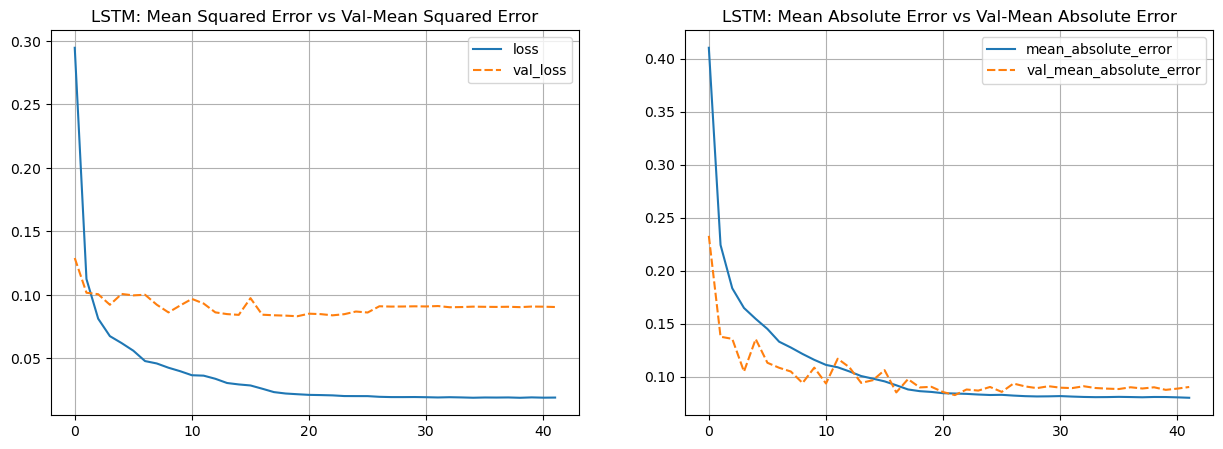

In [ ]:
eval(lstm_result)

#### CNN

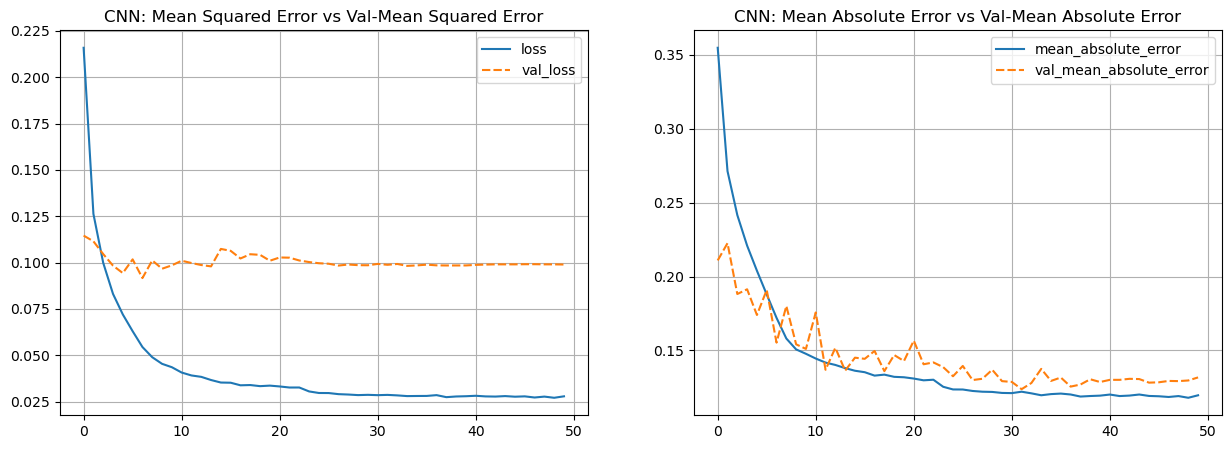

In [ ]:
eval(cnn_result)

#### GRU

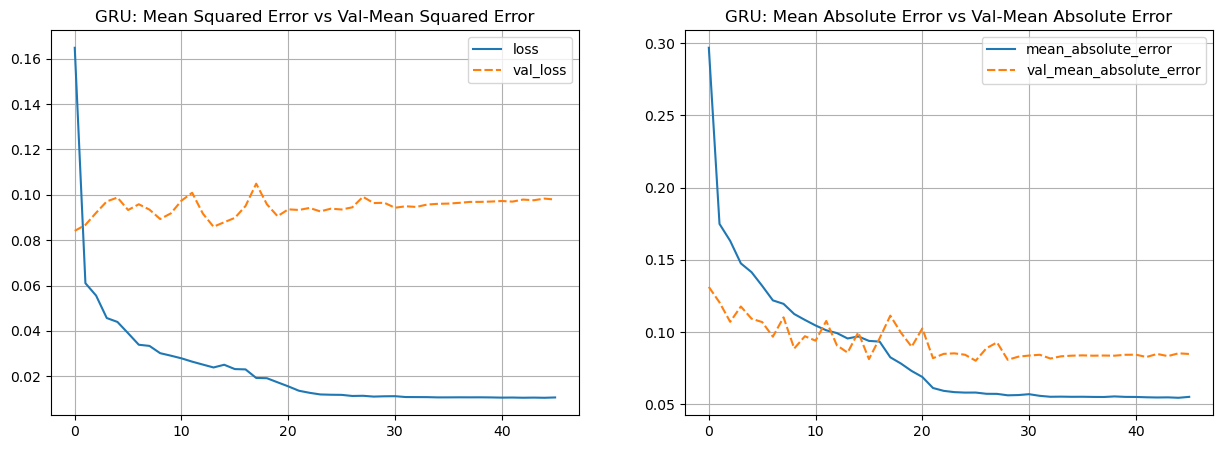

In [ ]:
eval(gru_result)

#### Overall Evaluation

In [ ]:
model_evaluation = pd.DataFrame(columns=['Mean Absolute Error', 'Val-Mean Absolute Error',
                                         'Mean Squared Error', 'Val-Mean Squared Error'],
                                index=['LSTM', 'CNN', 'GRU'])
# MAE
model_evaluation['Mean Absolute Error'] = [min(lstm_result.history['mean_absolute_error']),
                                          min(cnn_result.history['mean_absolute_error']),
                                          min(gru_result.history['mean_absolute_error'])]
# Val-MAE
model_evaluation['Val-Mean Absolute Error'] = [min(lstm_result.history['val_mean_absolute_error']),
                                               min(cnn_result.history['val_mean_absolute_error']),
                                               min(gru_result.history['val_mean_absolute_error'])]
# MSE
model_evaluation['Mean Squared Error'] = [min(lstm_result.history['loss']),
                                          min(cnn_result.history['loss']),
                                          min(gru_result.history['loss'])]
# Val-MSE
model_evaluation['Val-Mean Squared Error'] = [min(lstm_result.history['val_loss']), 
                                              min(cnn_result.history['val_loss']), 
                                              min(gru_result.history['val_loss'])]
model_evaluation

,Mean Absolute Error,Val-Mean Absolute Error,Mean Squared Error,Val-Mean Squared Error
LSTM,0.080348,0.082884,0.019053,0.083255
CNN,0.118009,0.123824,0.027023,0.091620
GRU,0.054592,0.080240,0.010496,0.084103


## **Conclusion MODEL:**  

The table shows error metrics for three different machine learning models evaluated on their prediction performance:

- **LSTM (Long Short-Term Memory)**: tends to have a lower average error in its predictions, with a slight increase in error when validated.
  
- **CNN (Convolutional Neural Network)**: has higher average errors in both training and validation, indicating it might not predict as accurately as LSTM.
  
- **GRU (Gated Recurrent Unit)**: shows a low error during training but a notable increase in error on validation, similar to LSTM.
The Mean Absolute Error (MAE) values reflect the average prediction error, and the Mean Squared Error (MSE) values give more weight to larger errors. Lower values are generally better for both metrics.

Based on the results of the above analysis, the model to be used in the model is the LSTM model, because it has a low average error, and a small error when validating the model.